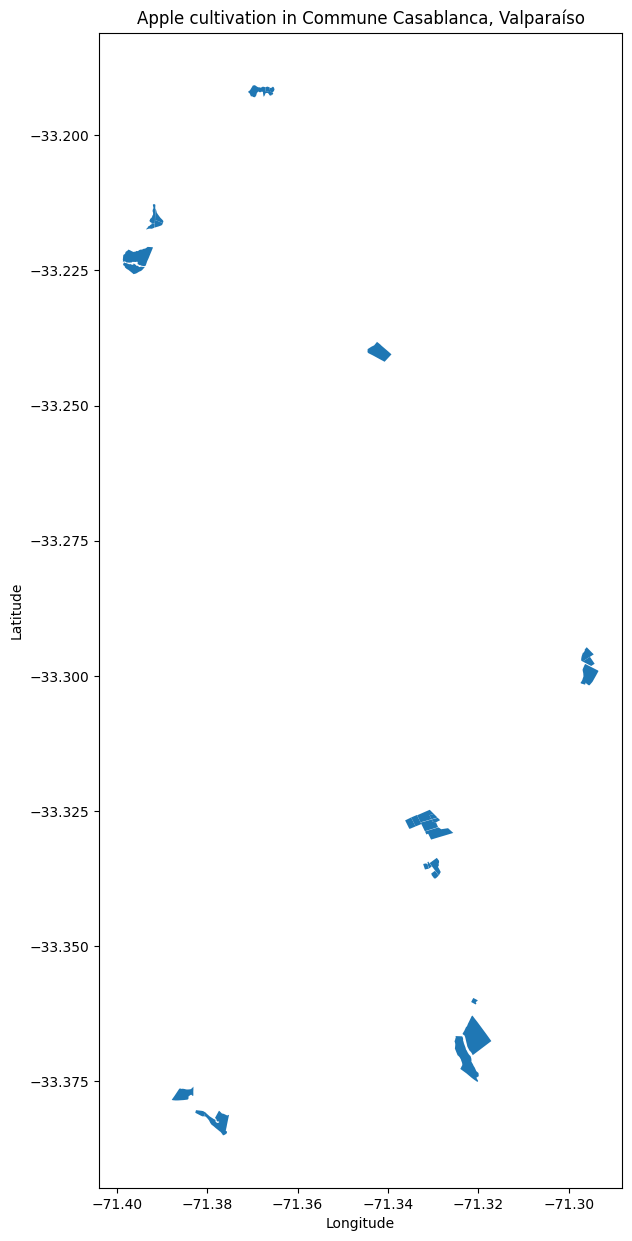

In [24]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt


# Import GeoJSON file of apple agri plots in Casablanca 
apple_casablanca = gpd.read_file(r'C:\Users\frederik.schonberger\fraunhofer.cl\CSET-PV Integrated Photovoltaics - APV\06 Publicactions\2023 Ordenamiento terretorial Agro PV\Data\QGIS\99 Output for Python\Apple Areas Casablanca 2020_GEOJSON.geojson')

apple_casablanca.head()


# Set figure size and projection
fig, ax = plt.subplots(figsize=(10, 15))
ax.set_aspect('auto')
ax.set(xlabel='Longitude', ylabel='Latitude')

# Plot the GeoDataFrame
apple_casablanca.plot(ax=ax)

# Set the map title
plt.title('Apple cultivation in Commune Casablanca, Valparaíso')

# Show the plot
plt.show()



Add centroids to areas 

In [26]:
# create a new column for the centroid of each polygon
apple_casablanca['centroid'] = apple_casablanca.centroid

# preview the updated GeoDataFrame
apple_casablanca.head()


C:\Users\frederik.schonberger\AppData\Local\Temp\ipykernel_22380\2535303555.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  apple_casablanca['centroid'] = apple_casablanca.centroid


,fid,ID,Region,Region_pun,Species,Species_pu,Plant_type,Irrigation,Irrigati_1,Irrigati_2,...,Distance_y,Number,Precipitat,Precipit_1,Precipit_2,Avg_air_te,Area,Area new,geometry,centroid
0,15,63928,RegiÃƒÂ³n de ValparaÃƒÂ­so,RegiÃƒÂ³n de ValparaÃƒÂ­so,MANZANO ROJO,MANZANO ROJO,GALA,NaN,GOTEO,TUBERIAS A PRESION,...,120.0,21905.0,33.1,-4.17051472933,0.009388,15.1,NaN,94128,"MULTIPOLYGON (((-71.29493 -33.29840, -71.29352...",POINT (-71.29558 -33.29980)
1,16,63929,RegiÃƒÂ³n de ValparaÃƒÂ­so,RegiÃƒÂ³n de ValparaÃƒÂ­so,MANZANO VERDE,MANZANO VERDE,GRANNY SMITH,NaN,GOTEO,TUBERIAS A PRESION,...,120.0,3810.0,33.1,-4.17051472933,0.007822,15.1,NaN,22716,"MULTIPOLYGON (((-71.29523 -33.29808, -71.29688...",POINT (-71.29550 -33.29736)
2,20,63933,RegiÃƒÂ³n de ValparaÃƒÂ­so,RegiÃƒÂ³n de ValparaÃƒÂ­so,MANZANO VERDE,MANZANO VERDE,GRANNY SMITH,NaN,GOTEO,TUBERIAS A PRESION,...,120.0,8333.0,33.1,-4.17051472933,0.006808,15.1,NaN,37414,"MULTIPOLYGON (((-71.29695 -33.29733, -71.29719...",POINT (-71.29609 -33.29605)
3,25,63938,RegiÃƒÂ³n de ValparaÃƒÂ­so,RegiÃƒÂ³n de ValparaÃƒÂ­so,MANZANO VERDE,MANZANO VERDE,GRANNY SMITH,NaN,SURCO,ACEQUIA,...,600.0,214.0,33.1,-4.17051472933,0.075917,15.1,NaN,9486,"MULTIPOLYGON (((-71.32015 -33.35998, -71.32020...",POINT (-71.32091 -33.36014)
4,26,63939,RegiÃƒÂ³n de ValparaÃƒÂ­so,RegiÃƒÂ³n de ValparaÃƒÂ­so,MANZANO VERDE,MANZANO VERDE,GRANNY SMITH,NaN,SURCO,ACEQUIA,...,500.0,3780.0,33.1,-4.17051472933,0.068608,15.1,NaN,102893,"MULTIPOLYGON (((-71.34081 -33.24187, -71.34191...",POINT (-71.34194 -33.24012)


PV Lib modelchain to assess energy yield potential 

In [ ]:
import pvlib 
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

# Location = Fruticulture plot in Valpo 

location = Location (latitude = -32.76359193999683, longitude = -70.66545073954828, tz = 'Chile/Continental', altitude=100, name = 'Valpo_testplot-fruticulture')
print (location)
